## CMPE 462 HOMEWORK 2


In [1]:
# Allowed Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Part 1: Dimensionality Reduction

# A: Creating Datasets
Steps:
* Generate 500 points from $\frac{x^2}{2^2}+ \frac{y^2}{5^2} \le 1$(From ellipse with 2, 5 radius on the x and y axes respectively). Example way:
    - Generate 500 angle values $\{\theta^t\}$ in range $[-\pi,+\pi]$
    - Generate 500 values $\{r^t\}$ in range $[0,1]$
    - Generate 500 points $\{x^t,y^t\}$ where $x^t = 2r^tsin(\theta^t)$ and $y^t = 5r^tcos(\theta^t)$.
* Generate 3 set of labels. Do it by dividing data using following Lines (eg. one side of line is label 0, other side is label 1)
    - $y=0$ line
    - $x=0$ line 
    - $y=3x +1$ line 
* Visualize points with each set of labels in subplots with 1 row, 3 columns where each column corresponds to one set of labels. (Use different colors for each label.)  

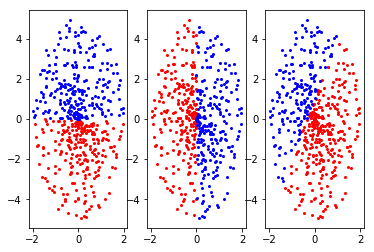

In [2]:
theta = np.random.uniform(-np.pi,np.pi,500)
r = np.random.uniform(0,1,500)
datax = []
datay = []
for i in range (0,500):
    x = 2*r[i]*np.sin(theta[i])
    y = 5*r[i]*np.cos(theta[i])
    datax.insert(i,x)
    datay.insert(i,y)


set1ax = []
set1bx = []
set2ax = []
set2bx = []
set3ax = []
set3bx = []
set1ay = []
set1by = []
set2ay = []
set2by = []
set3ay = []
set3by = []
for i in range(0,500):
    x = datax[i]
    y = datay[i]
    
    if(y < 0):
        set1ax.insert(i,datax[i])
        set1ay.insert(i,datay[i])
    else:
        set1bx.insert(i,datax[i])
        set1by.insert(i,datay[i])
    
    if(x < 0):
        set2ax.insert(i,datax[i])
        set2ay.insert(i,datay[i])
    else:
        set2bx.insert(i,datax[i])
        set2by.insert(i,datay[i])
    if(y < 3*x+1):
        set3ax.insert(i,datax[i])
        set3ay.insert(i,datay[i])
    else:
        set3bx.insert(i,datax[i])
        set3by.insert(i,datay[i])

plt.subplot(1,3,1)
plt.plot(set1ax,set1ay,'ro',markersize=2)
plt.plot(set1bx,set1by,'bo',markersize=2)
plt.subplot(1,3,2)
plt.plot(set2ax,set2ay,'ro',markersize=2)
plt.plot(set2bx,set2by,'bo',markersize=2)
plt.subplot(1,3,3)
plt.plot(set3ax,set3ay,'ro',markersize=2)
plt.plot(set3bx,set3by,'bo',markersize=2)

# B: Applying PCA
Steps:
* Write PCA function.
* Apply PCA to data you generated.
* Visualize each set of labels using first principle component. 
* Visualize each set of labels using second principle component. 

In [3]:
def PCA(data_x1,data_y1,data_x2,data_y2):
    
    data_x = data_x1 + data_x2
    data_y = data_y1 + data_y2
    
    S = np.cov(data_x,data_y)
    S1 = np.matrix(S)
    w, v = np.linalg.eig(S1)

    firstPCA1 = []
    secondPCA1 = []
    firstPCA2 = []
    secondPCA2 = []
    if(w[0] > w[1]):
        for i in range (0,len(data_x1)):
            tempx = v[0,0]*data_x1[i]
            tempy = v[0,1]*data_y1[i]
            temp = tempx+tempy
            firstPCA1.insert(i,temp)
            tempx2 = v[1,0]*data_x1[i]
            tempy2= v[1,1]*data_y1[i]
            temp2 = tempx2+tempy2
            secondPCA1.insert(i,temp2)
        for i in range (0,len(data_x2)):
            tempx = v[0,0]*data_x2[i]
            tempy = v[0,1]*data_y2[i]
            temp = tempx+tempy
            firstPCA2.insert(i,temp)
            tempx2 = v[1,0]*data_x2[i]
            tempy2= v[1,1]*data_y2[i]
            temp2 = tempx2+tempy2
            secondPCA2.insert(i,temp2)
    else:
        for i in range (0,len(data_x1)):
            tempx = v[1,0]*data_x1[i]
            tempy = v[1,1]*data_y1[i]
            temp = tempx+tempy
            firstPCA1.insert(i,temp)
            tempx2 = v[0,0]*data_x1[i]
            tempy2= v[0,1]*data_y1[i]
            temp2 = tempx2+tempy2
            secondPCA1.insert(i,temp2)
        for i in range (0,len(data_x2)):
            tempx = v[1,0]*data_x2[i]
            tempy = v[1,1]*data_y2[i]
            temp = tempx+tempy
            firstPCA2.insert(i,temp)
            tempx2 = v[0,0]*data_x2[i]
            tempy2= v[0,1]*data_y2[i]
            temp2 = tempx2+tempy2
            secondPCA2.insert(i,temp2)
            
    return firstPCA1, secondPCA1, firstPCA2,secondPCA2



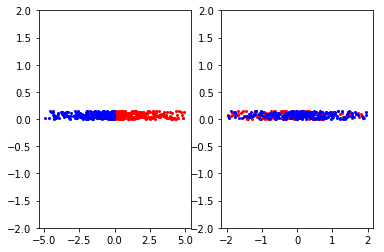

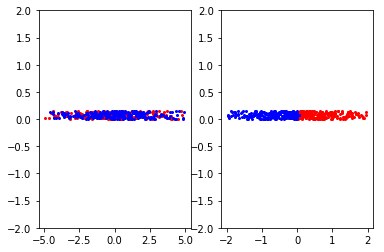

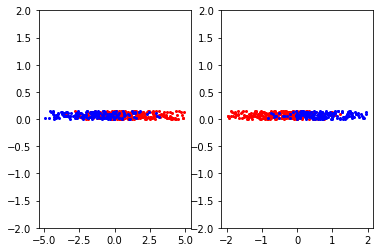

In [4]:

firstof11, secondof11, firstof12, secondof12 = PCA(set1ax,set1ay,set1bx,set1by)
x1 = np.linspace(0,0.15,len(firstof11))
x2 = np.linspace(0,0.15,len(firstof12))
plt.figure()
plt.subplot(1,2,1)
plt.ylim(-2,2)
plt.plot(firstof11,x1,'ro',markersize=2)
plt.plot(firstof12,x2,'bo',markersize=2)


x1 = np.linspace(0,0.15,len(secondof11))
x2 = np.linspace(0,0.15,len(secondof12))
plt.subplot(1,2,2)
plt.ylim(-2,2)
plt.plot(secondof11,x1,'ro',markersize=2)
plt.plot(secondof12,x2,'bo',markersize=2)

plt.figure()
firstof21, secondof21, firstof22, secondof22 = PCA(set2ax,set2ay,set2bx,set2by)
x1 = np.linspace(0,0.15,len(firstof21))
x2 = np.linspace(0,0.15,len(firstof22))
plt.subplot(1,2,1)
plt.ylim(-2,2)
plt.plot(firstof21,x1,'ro',markersize=2)
plt.plot(firstof22,x2,'bo',markersize=2)

x1 = np.linspace(0,0.15,len(secondof21))
x2 = np.linspace(0,0.15,len(secondof22))
plt.subplot(1,2,2)
plt.ylim(-2,2)
plt.plot(secondof21,x1,'ro',markersize=2)
plt.plot(secondof22,x2,'bo',markersize=2)
plt.figure()

firstof31, secondof31, firstof32, secondof32 = PCA(set3ax,set3ay,set3bx,set3by)
x1 = np.linspace(0,0.15,len(firstof31))
x2 = np.linspace(0,0.15,len(firstof32))
plt.subplot(1,2,1)
plt.ylim(-2,2)
plt.plot(firstof31,x1,'ro',markersize=2)
plt.plot(firstof32,x2,'bo',markersize=2)

x1 = np.linspace(0,0.15,len(secondof31))
x2 = np.linspace(0,0.15,len(secondof32))
plt.subplot(1,2,2)
plt.ylim(-2,2)
plt.plot(secondof31,x1,'ro',markersize=2)
plt.plot(secondof32,x2,'bo',markersize=2)

# C: Applying LDA
Steps:
* Apply LDA(https://scikit-learn.org/stable/modules/lda_qda.html) to data for each label set. You can use sklearn implementation.
* Visualize each set of labels using first component of corresponding LDA. 

In [5]:
# def LDA(L1x,L1y,L2x,L2y):
#     mean_x = [np.mean(L1x),np.mean(L2x)]
#     mean_y = [np.mean(L1y),np.mean(L2y)]
#     S = np.cov(L1x+L2x,L1y+L2y)
#     S1 = np.matrix(S)
#     w, v = np.linalg.eig(S1)
#     sqrtD = np.diag(np.sqrt(w))
#     LDAmat = np.matmul(sqrtD,v)
#     L1xy = [[],[]]
#     L2xy = [[],[]]
#     for i in range(0,len(L1y)):
#         L1xy[0].insert(i,L1x[i])
#         L1xy[1].insert(i,L1y[i])
#     for i in range(0,len(L2y)):
#         L2xy[0].insert(i,L2x[i])
#         L2xy[1].insert(i,L2y[i])
#     Projected1 = np.matmul(LDAmat, L1xy)
#     Projected2 = np.matmul(LDAmat, L2xy)       
#     return Projected1 , Projected2

In [6]:
# Projected11 ,Projected12 = LDA(set1ax,set1ay,set1bx,set1by)
# Projected21 ,Projected22 = LDA(set2ax,set2ay,set2bx,set2by)
# Projected31 ,Projected32 = LDA(set3ax,set3ay,set3bx,set3by)
# plt.subplot(1,3,1)
# plt.plot(Projected11[0],Projected11[1],'ro', markersize = 2)
# plt.plot(Projected12[0],Projected12[1],'bo', markersize = 2)
# plt.subplot(1,3,2)
# plt.plot(Projected21[0],Projected21[1],'ro', markersize = 2)
# plt.plot(Projected22[0],Projected22[1],'bo', markersize = 2)
# plt.subplot(1,3,3)
# plt.plot(Projected31[0],Projected31[1],'ro', markersize = 2)
# plt.plot(Projected32[0],Projected32[1],'bo', markersize = 2)
# plt.ylabel('')

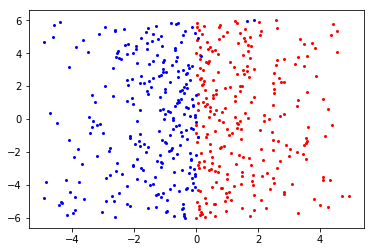

In [7]:
lda = LinearDiscriminantAnalysis(solver = 'eigen', n_components=1)
L1xy = []
L2xy = []
y = []
for i in range(0,len(set1ax)):
    xt = set1ax[i]
    yt = set1ay[i]
    L1xy.insert(i,[xt,yt])
    y.insert(i,1)
for i in range(0,len(set1bx)):
    xt = set1bx[i]
    yt = set1by[i]
    L2xy.insert(i,[xt,yt])
    y.insert(i,2)
    
X = L1xy+L2xy
X_r2= lda.fit(X, y).transform(X)
C1 = []
C2 = []
for i in range(len(X_r2)):
    if(y[i] < 2):
        C1.append(X_r2[i])
        #C2.append(None)
    else:
        C2.append(X_r2[i])
        #C1.append(None)


a1 = np.linspace(-6,6,len(C2))
a2 = np.linspace(-6,6,len(C1))

plt.plot(C1 , a2 , 'ro' ,markersize = 2)
plt.plot(C2 , a1 , 'bo' ,markersize = 2)


# D: Nonlinear Data
Steps:
* Use generated data below.
* Apply PCA and LDA to this data, and visualize it(seperately).

(-2, 2)

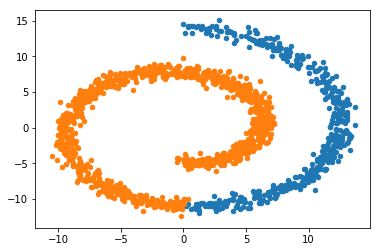

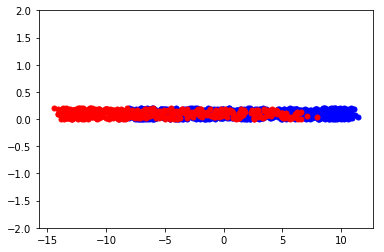

In [8]:
def genData():
    from sklearn.datasets import make_swiss_roll 
    n_samples = 1500
    noise = 0.5
    X, t = make_swiss_roll(n_samples, noise)
    # Make it thinner
    fig = plt.figure()
    Data = np.zeros([1500,2])
    Data[:,0] = X[:,0]
    Data[:,1] = X[:,2]
    Labels = np.zeros([1500,])
    Labels[t>11]=1

    plt.scatter(Data[Labels==1, 0], Data[Labels==1, 1],
       s=20,)
    plt.scatter(Data[Labels==0, 0], Data[Labels==0, 1],
       s=20,)
    return Data,Labels
Data,Labels=genData()

L1x = []
L2x = []
L1y = []
L2y = []
for i in range(0,len(Labels)):
    if(Labels[i] == 0):
        L1y.append(Data[i,1])
        L1x.append(Data[i,0])
    else:
        L2y.append(Data[i,1])
        L2x.append(Data[i,0])

plt.figure()
firstof11, secondof11, firstof12, secondof12 = PCA(L1x,L1y,L2x,L2y)
x1 = np.linspace(0,0.2,len(firstof11))
x2 = np.linspace(0,0.2,len(firstof12))
plt.plot(secondof11,x1,'bo',markersize=5)
plt.ylim(-2,2)
plt.plot(secondof12,x2,'ro',markersize=5)
plt.ylim(-2,2)

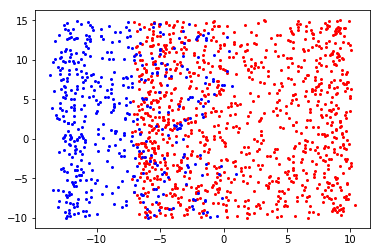

In [9]:
X_r= lda.fit(Data, Labels).transform(Data)
C1 = []
C2 = []
for i in range(len(X_r)):
    if(Labels[i] < 1):
        C1.append(X_r[i])
        C2.append(None)
    else:
        C2.append(X_r[i])
        C1.append(None)


a2 = np.linspace(-10,15,len(X_r))
plt.plot(C1 , a2 , 'ro' ,markersize = 2)
plt.plot(C2 , a2 , 'bo' ,markersize = 2)

# Part 2: Parametric and Non-Parametric Classification.

Download points2d.dat from https://www.cmpe.boun.edu.tr/~emre/courses/cmpe462/material/hws/hw2/points2d.dat. The sample includes 6000 instances. Each instance is represented by a feature vector of 2 dimensions. The third column corresponds to the class (0/1/2) of the instance.

## A: Mixture of Gaussians. 

Steps:
* Implement mixture of gaussians.
* Divide data to training and validation and test sets.
* At training:
    - Divide all data to their respective classes.
    - Run mixture of gaussians with k=1,2,3 using different initial points (the general practice is to use k-means to initialize the means, you can use sklearn implementation of k-means). 
* At validation, select best model:
    - Using validation data, select best number of gaussians for each class using prediction error.
* On test set, report (for the best model):
    - the number of Gaussians for class 0, 1 and 2,
    - the prediction error, and
    - the confusion matrix.

In [10]:
import urllib
import requests
from sklearn.cluster import KMeans
import scipy.stats

In [11]:
def iteration(arrdata, mean , cov, pi , k):
    notConvergence = True
    while notConvergence:
            #E step
        ric = []
        for c in range(0,k):
            for i in range (0,len(arrdata)):
                temp = pi[c]*scipy.stats.multivariate_normal.pdf(arrdata[i],mean = mean[c], cov = cov[c])
                norm = 0
                for c2 in range (0,k):
                    norm = norm + pi[c2]*scipy.stats.multivariate_normal.pdf(arrdata[i],mean = mean[c2], cov = cov[c2])
                ric.insert(c*len(arrdata)+i,temp/norm)
        #m step
        mc = []
        pi_new = []
        mean_new = []
        cov_new = []
        for c in range(0,k):
            tmpmc = 0
            for i in range (0, len(arrdata)):
                tmpmc = tmpmc + ric[c*len(arrdata)+i]
            mc.append(tmpmc)
        for c in range(0,k):
            pi_new.append(mc[c]/sum(mc))
            tmpmean0 = 0
            tmpmean1 = 0

            for i in range (0, len(arrdata)):
                tmpmean0 = tmpmean0 + (ric[c*len(arrdata)+i]*arrdata[i][0])
                tmpmean1 = tmpmean1 + (ric[c*len(arrdata)+i]*arrdata[i][1])
            mean_new.append([tmpmean0/mc[c],tmpmean1/mc[c]])
        for c in range (0,k):
            tmpcov = []
            temp = np.matrix([[0,0],[0,0]])
            for i in range (0,len(arrdata)):
                tempcov = np.multiply(ric[c*len(arrdata)+i],(np.transpose(np.matrix(np.subtract(arrdata[i],mean_new[c])))*np.matrix(np.subtract(arrdata[i],mean_new[c]))))
                temp = np.add(temp,tempcov)
            cov_new.append(np.divide(temp,mc[c]))
        if(np.abs(mean[0][0]-mean_new[0][0])< 0.013 and np.abs(mean[0][1]-mean_new[0][1])< 0.013 and np.abs(mean[k-1][0]-mean_new[k-1][0])< 0.013 and np.abs(mean[k-1][1]-mean_new[k-1][1])< 0.013):
            notConvergence = False
            print("converged")
        else:
            mean = mean_new 
            cov = cov_new
            pi = pi_new
            print(mean)
            print(cov)
            print(pi)
            


In [12]:

url = "https://www.cmpe.boun.edu.tr/~emre/courses/cmpe462/material/hws/hw2/points2d.dat"
username = 'cmpe--462'
password = 'cmpe--462'
r = requests.get(url, auth=(username, password))  
data = r.content.decode("utf-8").split('\n')
arrdata = []
labels = []
for i in range (0,len(data)-1):
    temp = data[i].split(' ')
    arrdata.append([float(temp[0]),float(temp[1])])
    labels.append(temp[2])

def MixtureOfGaussians(arrdata, labels, k):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(arrdata)
    mean = kmeans.cluster_centers_
    labels = kmeans.labels_
    k_sets = [[],[],[],[]]
        
    for j in range (0,k):
        for i in range (0,len(labels)):
            if(labels[i] == j):
                k_sets[j].append(arrdata[i])
    cov = []
    pi = []
    x = []
    y = []
    
    for j in range (0,k):
        for i in range(0,len(k_sets[j])):
            x.append(k_sets[j][i][0])
            y.append(k_sets[j][i][1])
        cov.append(np.cov(x,y))
    for i in range (0,k):
        pi.append(len(k_sets[i])/len(arrdata))
    iteration(arrdata, mean , cov, pi , k)
            


In [13]:
MixtureOfGaussians(arrdata, labels, 2)

[[-0.8399440870507184, 1.3661803448072622], [-3.37390539931193, -2.771995552913397]]
[matrix([[7.31602795, 0.3726374 ],
        [0.3726374 , 5.56504423]]), matrix([[7.13791352, 0.85457985],
        [0.85457985, 8.53076628]])]
[0.47445835159597266, 0.5255416484040274]
[[-0.8630543535499157, 1.3560047828821604], [-3.3276385412479343, -2.720788781486414]]
[matrix([[7.73951522, 0.81745295],
        [0.81745295, 6.02818535]]), matrix([[6.93198535, 0.66838021],
        [0.66838021, 8.33776423]])]
[0.469041493867231, 0.530958506132769]
[[-0.8905436183549541, 1.3291210744495785], [-3.2985874498826053, -2.6890848281159263]]
[matrix([[7.92116818, 0.99142649],
        [0.99142649, 6.21614776]]), matrix([[6.90347431, 0.69078463],
        [0.69078463, 8.39187707]])]
[0.4679903011064286, 0.5320096988935714]
[[-0.9162530675752829, 1.3029382493327935], [-3.275528164459023, -2.6653066171895956]]
[matrix([[8.03076732, 1.08762897],
        [1.08762897, 6.3225425 ]]), matrix([[6.91614638, 0.75320599],
   

[[-1.3586335041746929, 1.1828415640899352], [-2.9126151530315543, -2.6235794833442685]]
[matrix([[9.30930937, 1.7824558 ],
        [1.7824558 , 6.5955178 ]]), matrix([[7.22923534, 1.74903961],
        [1.74903961, 8.85795954]])]
[0.47681956957994204, 0.523180430420058]
[[-1.373496673686693, 1.1850045224525176], [-2.900410657306406, -2.6289017957166654]]
[matrix([[9.34333213, 1.79842089],
        [1.79842089, 6.58478863]]), matrix([[7.23604514, 1.77791378],
        [1.77791378, 8.84193664]])]
[0.4772792528170462, 0.5227207471829538]
[[-1.3883605562366017, 1.1872346300116365], [-2.8881861723795885, -2.6343708491454723]]
[matrix([[9.37652521, 1.81450547],
        [1.81450547, 6.57386688]]), matrix([[7.24286202, 1.80678657],
        [1.80678657, 8.82528349]])]
[0.4777487946457242, 0.5222512053542759]
[[-1.4032090156082484, 1.189515721990007], [-2.8759543960566307, -2.6399715404488275]]
[matrix([[9.40882803, 1.83071097],
        [1.83071097, 6.56280554]]), matrix([[7.24970074, 1.83563525],


## B: K-Nearest Neighbor
Steps:
* Implement k-nearest neighbor. 
* Run it with k=1,10,40. 
* Using test set, Report
    - best k,
    - prediction error for all k’s.
    - confusion matrix for all k’s.

In [14]:
import random
training = []
validation = []
valid_labels = []
train_labels = []
for x in range(len(arrdata)):
    if(random.randint(-1,1) < 0):
        validation.append(arrdata[x])
        valid_labels.append(float(labels[x]))
    else:
        training.append(arrdata[x])
        train_labels.append(float(labels[x]))



In [15]:
import math
def Distance(instance1, instance2):
    distance = 0
    for i in range (0,2):
        distance = distance + pow((instance1[i] - instance2[i]), 2) 
    return math.sqrt(distance)


In [16]:
def getNeighbors(traindata, testInstance,trainingl, k):
    distance = []
    for i in range(0,len(traindata)):
        dist = Distance(testInstance, traindata[i])
        distance.append([dist,trainingl[i]])
    sorted_list = sorted(distance,key=lambda x: (x[0]))
    neigbors = []
    for i in range (0,k):   
        neigbors.append(sorted_list[i])
    return neigbors

In [17]:
def vote(neigbors):
    votes = [0,0,0]
    for i in range(0,len(neigbors)):
        temp = neigbors[i][1]
        if (temp == 1):
            votes[1] += 1
        elif (temp == 0):
            votes[0] += 1
        else:
            votes[2] += 1
    return votes

In [65]:
k = 1
predicted1 = [-1]*len(validation)
for e in range (0,len(validation)):
    temp = validation[e]
    actual = labels[e]
    neigbors = getNeighbors(training,temp,train_labels,k)
    votes = vote(neigbors)
    if(votes[0] >= votes[1] and votes[0] >= votes[2]):
        predicted1[e] = 0
    elif(votes[1] >= votes[2] and votes[1] >= votes[0]):
        predicted1[e] = 1
    else:
        predicted1[e] = 2
#print(predicted1)

[1, 0, 0, 2, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 0, 2, 0, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 1, 0, 2, 2, 0, 0, 2, 2, 1, 1, 2, 0, 1, 2, 1, 2, 2, 1, 2, 1, 0, 1, 0, 2, 2, 1, 2, 2, 1, 2, 1, 2, 0, 0, 2, 0, 0, 1, 1, 1, 0, 2, 0, 1, 0, 0, 0, 0, 2, 1, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 1, 2, 1, 0, 1, 0, 2, 2, 0, 2, 2, 0, 1, 1, 2, 0, 1, 1, 0, 2, 2, 0, 0, 0, 2, 0, 2, 1, 0, 0, 1, 1, 0, 2, 1, 1, 0, 2, 0, 2, 1, 2, 1, 2, 2, 0, 0, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 0, 0, 1, 2, 0, 2, 1, 0, 2, 0, 2, 1, 2, 0, 0, 0, 1, 1, 1, 0, 0, 2, 0, 0, 2, 1, 0, 1, 1, 0, 1, 0, 0, 0, 2, 1, 2, 2, 0, 0, 1, 2, 0, 1, 0, 2, 2, 1, 2, 0, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 2, 2, 1, 1, 0, 1, 1, 2, 0, 2, 0, 1, 1, 0, 0, 2, 2, 1, 1, 2, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 1, 0, 2, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 2, 0, 1, 0, 1, 2, 2, 1, 1, 1, 0, 0, 2, 2, 1, 1, 2, 1, 0, 0, 2, 1, 1, 2, 2, 0, 2, 1, 1, 2, 1, 0, 1, 0, 

In [60]:
k = 10
predicted10 = [-1]*len(validation)
for e in range (0,len(validation)):
    temp = validation[e]
    actual = labels[e]
    neigbors = getNeighbors(training,temp,train_labels,k)
    votes = vote(neigbors)
    if(votes[0] >= votes[1] and votes[0] >= votes[2]):
        predicted10[e] = 0
    elif(votes[1] >= votes[2] and votes[1] >= votes[0]):
        predicted10[e] = 1
    else:
        predicted10[e] = 2


In [61]:
k = 40
predicted40 = [-1]*len(validation)
for e in range (0,len(validation)):
    temp = validation[e]
    actual = labels[e]
    neigbors = getNeighbors(training,temp,train_labels,k)
    votes = vote(neigbors)
    if(votes[0] >= votes[1] and votes[0] >= votes[2]):
        predicted40[e] = 0
    elif(votes[1] >= votes[2] and votes[1] >= votes[0]):
        predicted40[e] = 1
    else:
        predicted40[e] = 2


In [67]:
error1 = 0
known1 = 0
k1 = [[0,0,0],[0,0,0],[0,0,0]] #predicted,actual
k2 = [[0,0,0],[0,0,0],[0,0,0]] #predicted,actual
k3 = [[0,0,0],[0,0,0],[0,0,0]] #predicted,actual

for i in range (len(predicted1)):
    if(predicted1[i] == valid_labels[i]):
        known1 += 1
    else:
        error1 += 1
    
    if(predicted1[i] == 0):   
        if(valid_labels[i] == 0):
            k1[0][0] += 1
        if(valid_labels[i] == 1):
            k1[0][1] += 1
        if(valid_labels[i] == 2):
            k1[0][2] += 1
    elif(predicted1[i] == 1):
        
        if(valid_labels[i] == 0):
            k1[1][0] += 1
        if(valid_labels[i] == 1):
            k1[1][1] += 1
        if(valid_labels[i] == 2):
            k1[1][2] += 1
    elif(predicted1[i] == 2):
        
        if(valid_labels[i] == 0):
            k1[2][0] += 1
        if(valid_labels[i] == 1):
            k1[2][1] += 1
        if(valid_labels[i] == 2):
            k1[2][2] += 1
error10 = 0
known10 = 0
for i in range (len(predicted10)):
    if(predicted10[i] == valid_labels[i]):
        known10 += 1
    else:
        error10 += 1
    if(predicted10[i] == 0):
        if(valid_labels[i] == 0):
            k2[0][0] += 1
        if(valid_labels[i] == 1):
            k2[0][1] += 1
        if(valid_labels[i] == 2):
            k2[0][2] += 1
    elif(predicted10[i] == 1):
        if(valid_labels[i] == 0):
            k2[1][0] += 1
        if(valid_labels[i] == 1):
            k2[1][1] += 1
        if(valid_labels[i] == 2):
            k2[1][2] += 1
    elif(predicted10[i] == 2):
        if(valid_labels[i] == 0):
            k2[2][0] += 1
        if(valid_labels[i] == 1):
            k2[2][1] += 1
        if(valid_labels[i] == 2):
            k2[2][2] += 1
error40 = 0
known40 = 0
for i in range (len(predicted40)):
    if(predicted40[i] == valid_labels[i]):
        known40 += 1
    else:
        error40 += 1
    if(predicted40[i] == 0):
        if(valid_labels[i] == 0):
            k3[0][0] += 1
        if(valid_labels[i] == 1):
            k3[0][1] += 1
        if(valid_labels[i] == 2):
            k3[0][2] += 1
    if(predicted40[i] == 1):
        if(valid_labels[i] == 0):
            k3[1][0] += 1
        if(valid_labels[i] == 1):
            k3[1][1] += 1
        if(valid_labels[i] == 2):
            k3[1][2] += 1
    if(predicted40[i] == 2):
        if(valid_labels[i] == 0):
            k3[2][0] += 1
        if(valid_labels[i] == 1):
            k3[2][1] += 1
        if(valid_labels[i] == 2):
            k3[2][2] += 1
        
print ("error for k = 1 -> " , error1/(error1+known1))
print ("error for k = 10 -> " , error10/(known10+error10))
print ("error for k = 40 -> " , error40/(known40+error40))
print (k1,k2,k3)

error for k = 1 ->  0.3286201852754754
error for k = 10 ->  0.257435397367138
error for k = 40 ->  0.24329595319356412
[[503, 143, 35], [165, 369, 138], [43, 150, 505]] [[547, 105, 13], [148, 469, 158], [16, 88, 507]] [[537, 81, 12], [157, 494, 145], [17, 87, 521]]


In [86]:
print ("for k = 1    actual 0   actual 1   actual 2")
for i in range(0,3):
    print("predicted" ,i , "  ",k1[i][0] ,"      ", k1[i][1] ,"       ", k1[i][2])
print()
print ("for k = 10   actual 0   actual 1   actual 2")

for i in range(0,3):
    print("predicted" ,i , "  ",k2[i][0] ,"      ", k2[i][1] ,"       ", k2[i][2])
print()
print ("for k = 40   actual 0   actual 1   actual 2")
for i in range(0,3):
    print("predicted" ,i , "  ",k3[i][0] ,"      ", k3[i][1] ,"       ", k3[i][2])

for k = 1    actual 0   actual 1   actual 2
predicted 0    503        143         35
predicted 1    165        369         138
predicted 2    43        150         505

for k = 10   actual 0   actual 1   actual 2
predicted 0    547        105         13
predicted 1    148        469         158
predicted 2    16        88         507

for k = 40   actual 0   actual 1   actual 2
predicted 0    537        81         12
predicted 1    157        494         145
predicted 2    17        87         521
